In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
DATA_PATH = Path() / "../data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "../plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)


In [58]:
from missingno import matrix

In [59]:
train_df = load_data("train.csv")
train_df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


# EDA

In [60]:
train_df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

<AxesSubplot: >

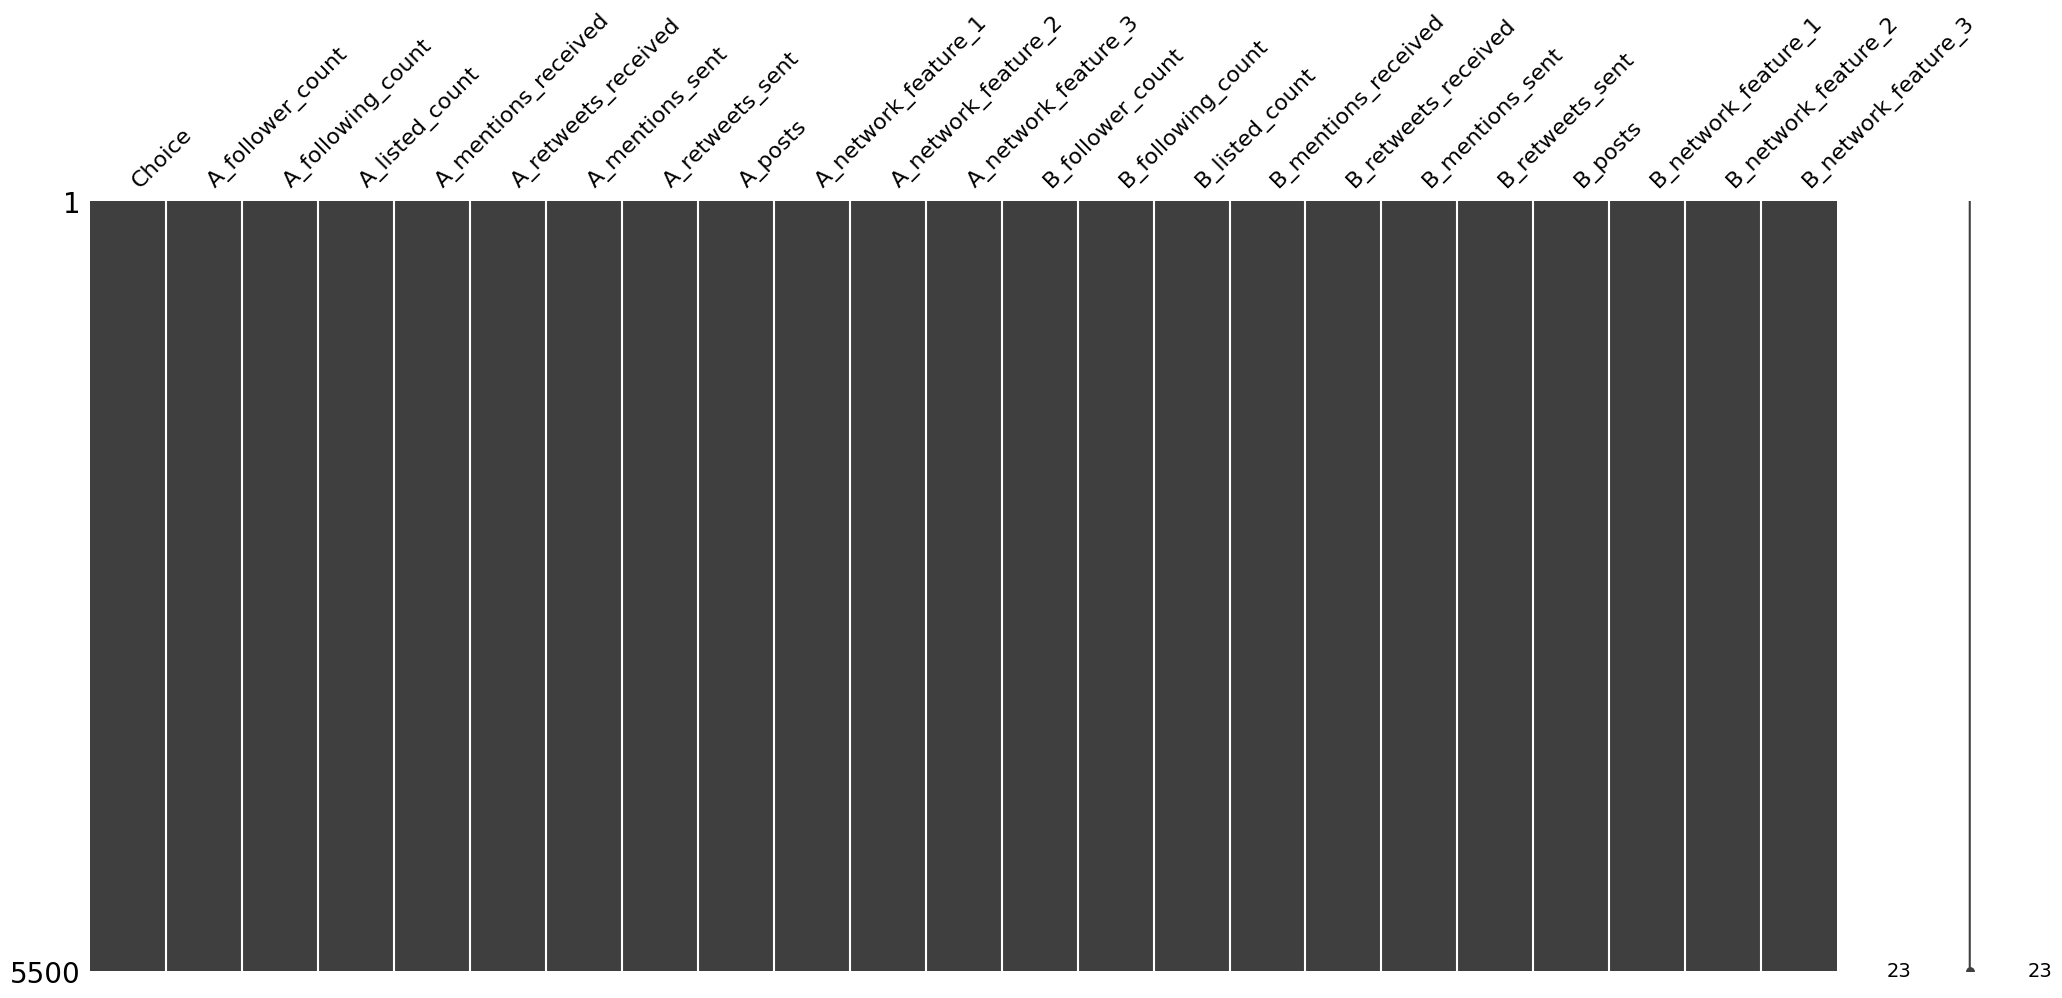

In [62]:
matrix(train_df)

# Feature Engineering

In [63]:
# List of features for which to perform the transformations, excluding 'Choice'
features = [col[2:] for col in train_df.columns if col.startswith('A_')]

# Initialize a new DataFrame to store transformed features
transformed_data = train_df[['Choice']].copy()

for feature in features:
    A = train_df['A_' + feature]
    B = train_df['B_' + feature]
    
    transformed_data[feature + '_sum'] = A + B
    transformed_data[feature + '_diff'] = A - B
    
    # Adding a small number to avoid division by zero
    transformed_data[feature + '_ratio'] = A / (B + 0.0001)  
    transformed_data[feature + '_normalized_diff'] = (A - B) / (A + B + 0.0001)  

transformed_data.head()


,Choice,follower_count_sum,follower_count_diff,follower_count_ratio,follower_count_normalized_diff,following_count_sum,following_count_diff,following_count_ratio,following_count_normalized_diff,listed_count_sum,...,network_feature_1_ratio,network_feature_1_normalized_diff,network_feature_2_sum,network_feature_2_diff,network_feature_2_ratio,network_feature_2_normalized_diff,network_feature_3_sum,network_feature_3_diff,network_feature_3_ratio,network_feature_3_normalized_diff
0,0,34691,-34235,0.006616,-0.986855,30110,-29506,0.010132,-0.979940,1692,...,0.030303,-0.941175,242.030303,90.969697,2.204410,0.375861,13271.893939,9438.106061,5.923645,0.711135
1,0,60853,-17671,0.549921,-0.290388,2027,331,1.390330,0.163296,1838,...,2.263802,0.387218,150.473646,-113.587704,0.139687,-0.754867,4261.881385,-1601.149290,0.453815,-0.375691
2,0,10932,3688,2.018222,0.337358,1697,733,2.520746,0.431939,307,...,31.665611,0.938775,79.261168,58.594502,6.670371,0.739258,6277.230241,5722.563574,21.634236,0.911638
3,0,19582,-19542,0.001022,-0.997957,17644,-17630,0.000397,-0.999207,280,...,0.003405,-0.993213,25.469296,-21.469296,0.085217,-0.842945,1492.012300,-1299.678967,0.068895,-0.871091
4,1,53143,38035,6.035081,0.715710,2573,-849,0.503799,-0.329965,2822,...,6.482345,0.732704,175.904293,78.904293,2.626887,0.448564,4827.475850,840.220036,1.421453,0.174050


In [64]:
from sklearn.preprocessing import MinMaxScaler

X = transformed_data.drop('Choice', axis=1)
y = transformed_data['Choice']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

X_normalized_df.head()


,follower_count_sum,follower_count_diff,follower_count_ratio,follower_count_normalized_diff,following_count_sum,following_count_diff,following_count_ratio,following_count_normalized_diff,listed_count_sum,listed_count_diff,...,network_feature_1_ratio,network_feature_1_normalized_diff,network_feature_2_sum,network_feature_2_diff,network_feature_2_ratio,network_feature_2_normalized_diff,network_feature_3_sum,network_feature_3_diff,network_feature_3_ratio,network_feature_3_normalized_diff
0,0.000481,0.507400,1.385622e-08,0.006568,0.025744,0.347553,1.790937e-11,0.010030,0.002135,0.510798,...,1.417896e-11,0.029412,0.126954,0.659024,2.636854e-07,0.687930,0.090481,0.386341,1.329181e-08,0.855567
1,0.000844,0.507632,1.152530e-06,0.354804,0.001730,0.363888,2.457673e-09,0.581648,0.002319,0.511084,...,1.059247e-09,0.693609,0.078929,0.588358,1.670896e-08,0.122566,0.029055,0.335476,1.018296e-09,0.312155
2,0.000150,0.507932,4.229835e-06,0.668679,0.001448,0.364108,4.455899e-09,0.715969,0.000386,0.512285,...,1.481654e-08,0.969387,0.041575,0.647840,7.978913e-07,0.869629,0.042795,0.369221,4.854411e-08,0.955819
3,0.000271,0.507606,2.133421e-09,0.001017,0.015084,0.354055,7.015837e-13,0.000397,0.000352,0.512124,...,1.593324e-12,0.003394,0.013360,0.620181,1.019346e-08,0.078527,0.010172,0.336865,1.545902e-10,0.064454
4,0.000737,0.508414,1.264848e-05,0.857856,0.002197,0.363242,8.905604e-10,0.335017,0.003561,0.514698,...,3.033130e-09,0.866352,0.092268,0.654856,3.142210e-07,0.724282,0.032911,0.346725,3.189535e-09,0.587025


# Modeling Evaluation

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3, random_state=42)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Define models to evaluate
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.771429 (0.022851)
KNN: 0.748312 (0.023129)
CART: 0.708052 (0.017739)
RF: 0.772208 (0.021326)
NB: 0.581558 (0.014483)
SVM: 0.765714 (0.019115)
XGB: 0.754286 (0.023868)


In [67]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.770303 (0.035593)
KNN: 0.746667 (0.030400)
CART: 0.718182 (0.036288)
RF: 0.767273 (0.037576)
NB: 0.637576 (0.015523)
SVM: 0.773333 (0.034731)
XGB: 0.754545 (0.044557)


# Correlation Analysis

In [68]:
correlation_matrix = X_normalized_df.corr()

high_corr_pairs = correlation_matrix.abs().stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']]  # Remove self-correlation
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.8]
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

# Display high correlation pairs
high_corr_pairs


,Feature1,Feature2,Correlation
695,mentions_received_normalized_diff,network_feature_1_normalized_diff,0.995093
544,mentions_received_sum,retweets_received_sum,0.988603
589,mentions_received_diff,retweets_received_diff,0.988363
679,mentions_received_normalized_diff,retweets_received_normalized_diff,0.948903
871,retweets_received_normalized_diff,network_feature_1_normalized_diff,0.948086
736,retweets_received_sum,network_feature_1_sum,0.923584
781,retweets_received_diff,network_feature_1_diff,0.920574
560,mentions_received_sum,network_feature_1_sum,0.916290
605,mentions_received_diff,network_feature_1_diff,0.914479
143,follower_count_normalized_diff,listed_count_normalized_diff,0.895252


In [69]:
# List of features to remove
features_to_remove = [
    'network_feature_1_normalized_diff',
    'retweets_received_sum',
    'retweets_received_diff',
    'listed_count_sum',
    'posts_normalized_diff',
    'network_feature_3_normalized_diff'
]

# Remove the selected features
X_normalized_df = X_normalized_df.drop(features_to_remove, axis=1)

# Feature Selection

In [70]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_normalized_df, y)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importances_df = pd.DataFrame({'Feature': X_normalized_df.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importances_df


,Feature,Importance
10,listed_count_normalized_diff,0.104540
8,listed_count_diff,0.074062
3,follower_count_normalized_diff,0.061140
16,retweets_received_normalized_diff,0.058391
14,mentions_received_normalized_diff,0.055325
1,follower_count_diff,0.054092
29,network_feature_1_diff,0.047156
2,follower_count_ratio,0.033104
15,retweets_received_ratio,0.031433
12,mentions_received_diff,0.030442


In [71]:
# Select the top 26 features
top_features = feature_importances_df['Feature'].head(20)

# Filter the dataset to include only the top 26 features
X_filtered = X_normalized_df[top_features]

# Split the filtered dataset into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

In [72]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_filtered, y_train_filtered, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.764675 (0.020655)
KNN: 0.756104 (0.021714)
CART: 0.711688 (0.016262)
RF: 0.769870 (0.021140)
NB: 0.737662 (0.017151)
SVM: 0.764675 (0.021044)
XGB: 0.756623 (0.027440)


In [73]:
# Evaluate each model in turn
results_filtered = []
names_filtered = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results_filtered = cross_val_score(model, X_test_filtered, y_test_filtered, cv=kfold, scoring='accuracy')
    results_filtered.append(cv_results)
    names_filtered.append(name)
    print('%s: %f (%f)' % (name, cv_results_filtered.mean(), cv_results_filtered.std()))

LR: 0.769697 (0.034710)
KNN: 0.738788 (0.027964)
CART: 0.716970 (0.039468)
RF: 0.766667 (0.035881)
NB: 0.675758 (0.028200)
SVM: 0.766061 (0.036685)
XGB: 0.754545 (0.044392)


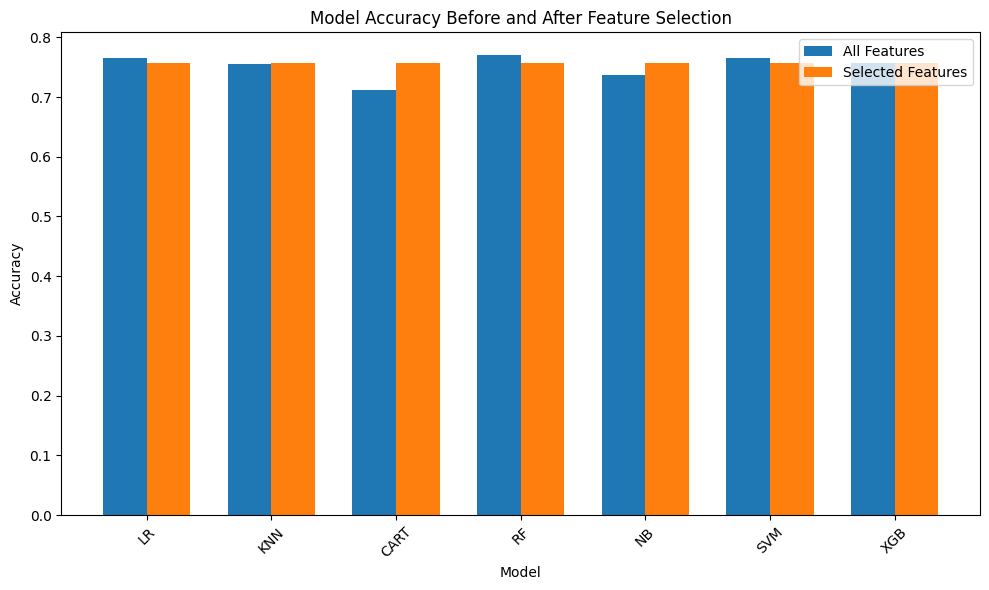

In [74]:
import numpy as np

mean_scores = [np.mean(r) for r in results]  # Up to SVM, excluding XGB
mean_scores_filtered = [np.mean(r) for r in results_filtered]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(mean_scores))

bars1 = ax.bar(index, mean_scores, bar_width, label='All Features')
bars2 = ax.bar(index + bar_width, mean_scores_filtered, bar_width, label='Selected Features')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Before and After Feature Selection')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()